 # Part 5: Filling area on line plots
 We are using the same survey data that has median salaries for developers, by age.

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

Let's get started by jumping onto an example.

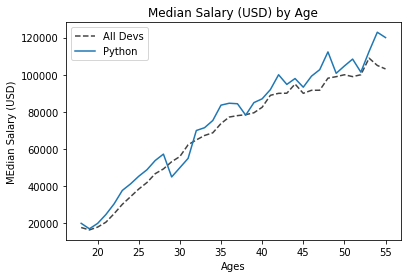

In [11]:
# Load data using `read_csv` method in pandas.
data = pd.read_csv('data/part_05/data.csv')

# Create lists that contain age and salaries.
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

# Lineplot where x-axis = age and y-axis = dev_salaries.
# linestyle='--' means dashed style.
plt.plot(ages, dev_salaries, color='#444444',
        linestyle='--', label='All Devs')

# No linestyle means solid line.
plt.plot(ages, py_salaries, label='Python')
plt.legend()
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.show()

But this plot is something very similar to what we have already covered in previous chapters.  
Let's see how can we add some fill to our plots.

Suppose we want to fill the entire area under python line.

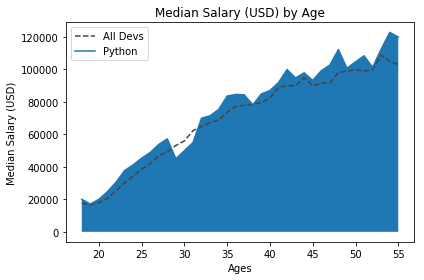

In [14]:
plt.plot(ages, dev_salaries, color='#444444',
        linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

plt.fill_between(ages, py_salaries) # new line. we could pass more arguments if we wanted.

plt.legend()
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.show()

We note that the fill under python line interferes with the line for all developers. It is possible to pass an `alpha` parameter that adds transparency to the fill.

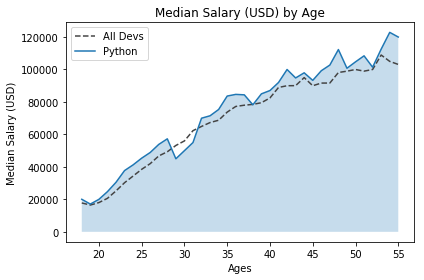

In [15]:
plt.plot(ages, dev_salaries, color='#444444',
        linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

plt.fill_between(ages, py_salaries, alpha = 0.25) # note that alpha modifies fill but not the line.

plt.legend()
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.show()

We can change the behaviour of the fill. Right now, it fills everythin between the line and the value y = 0. This can be modified so the fill goes down to a certain threshold. For example, an overall mean salary.

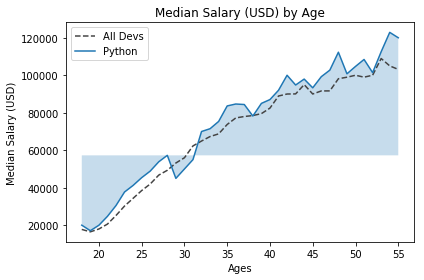

In [19]:
plt.plot(ages, dev_salaries, color='#444444',
        linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

overall_median = 57287
plt.fill_between(ages, py_salaries, overall_median, alpha = 0.25)

plt.legend()
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.show()

Here we see exactly where the python line crosses the median salary. Also, we note when the line is below the specified threshold, the area above the line and below the median is filled.  

If we wanted,  we can put additional conditions to the fill. For example, we can specify that we want to fill only when the line is above the median salary, or specify different colors.

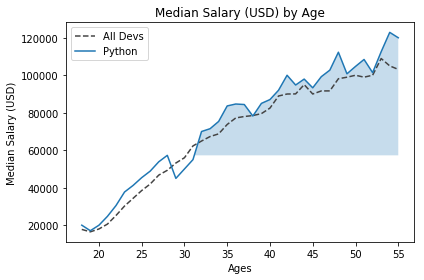

In [22]:
plt.plot(ages, dev_salaries, color='#444444',
        linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

overall_median = 57287
# Only fills where py_salaries > ovewrall_median
plt.fill_between(ages, py_salaries, overall_median, 
                 where=(py_salaries > overall_median), 
                 interpolate=True, alpha=0.25)

plt.legend()
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.show()

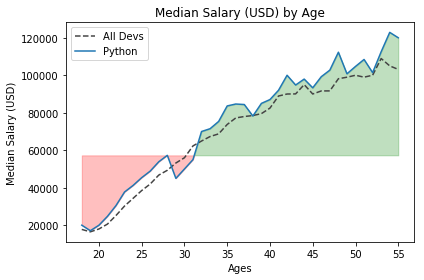

In [26]:
plt.plot(ages, dev_salaries, color='#444444',
        linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

overall_median = 57287

# For conditional fill with different colors we need more than
# one `plt.fill_between` statement.
plt.fill_between(ages, py_salaries, overall_median, 
                 where=(py_salaries > overall_median), 
                 interpolate=True, color='green', alpha=0.25)
plt.fill_between(ages, py_salaries, overall_median,
                 where=(py_salaries <= overall_median),
                 interpolate=True, color='red', alpha=0.25)

plt.legend()
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.show()

We can also fill the area between to lines, for example, the area between python and all developers lines.  
Instead of using the constant value `overall_median` we have to pass the list `dev_salaries`.

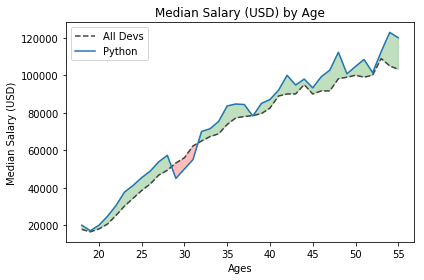

In [28]:
plt.plot(ages, dev_salaries, color='#444444',
        linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

overall_median = 57287

# For conditional fill with different colors we need more than
# one `plt.fill_between` statement.
plt.fill_between(ages, py_salaries, dev_salaries, 
                 where=(py_salaries > dev_salaries), 
                 interpolate=True, color='green', alpha=0.25)
plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries <= dev_salaries),
                 interpolate=True, color='red', alpha=0.25)

plt.legend()
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.show()

It is possible that somebody see the plot and still don't understand what is the meaning of the fill. We can pass a `label` option to the `fill_between` method. 

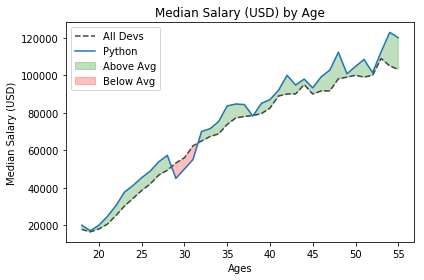

In [30]:
plt.plot(ages, dev_salaries, color='#444444',
        linestyle='--', label='All Devs')
plt.plot(ages, py_salaries, label='Python')

overall_median = 57287

# For conditional fill with different colors we need more than
# one `plt.fill_between` statement.
plt.fill_between(ages, py_salaries, dev_salaries, 
                 where=(py_salaries > dev_salaries), 
                 interpolate=True, color='green', alpha=0.25, label='Above Avg')
plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries <= dev_salaries),
                 interpolate=True, color='red', alpha=0.25, label='Below Avg')

plt.legend()
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.tight_layout()
plt.show()